<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/4week/DL_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

wine = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/4주차/winequality-white.csv", sep=";")

X = wine.drop("quality", axis=1)
y = wine["quality"]

scaler = StandardScaler()
X = scaler.fit_transform(X)

Y = pd.get_dummies(y).values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

model = models.Sequential([
    layers.Input(shape=(X.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(Y.shape[1], activation='softmax')
])


model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4312 - loss: 1.4366 - val_accuracy: 0.5395 - val_loss: 1.1116
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5268 - loss: 1.1206 - val_accuracy: 0.5485 - val_loss: 1.0674
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5470 - loss: 1.0788 - val_accuracy: 0.5599 - val_loss: 1.0370
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5603 - loss: 1.0050 - val_accuracy: 0.5459 - val_loss: 1.0345
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5770 - loss: 1.0203 - val_accuracy: 0.5497 - val_loss: 1.0257
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5674 - loss: 1.0264 - val_accuracy: 0.5804 - val_loss: 1.0184
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5635 - loss: 0.9951 - val_accuracy: 0.5497 - val_loss: 1.0253
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5628 - loss: 1.0042 - val_accuracy: 0.

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


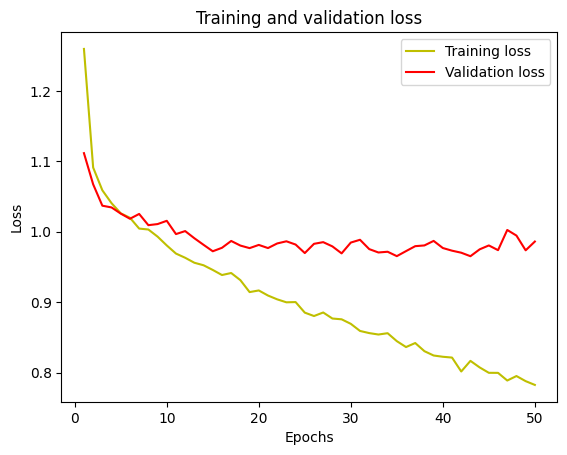

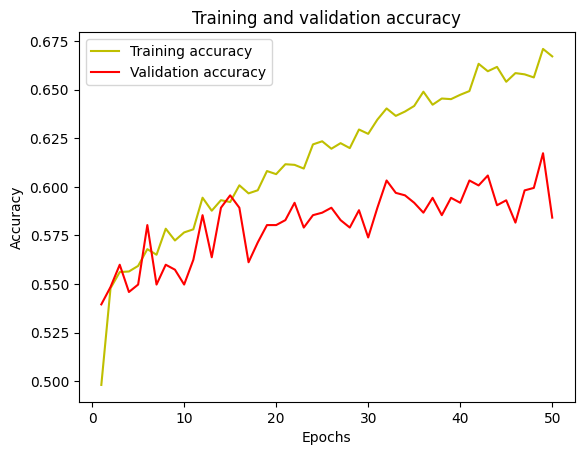

              precision    recall  f1-score   support

           0       1.00      0.11      0.20         9
           1       0.57      0.31      0.41        51
           2       0.62      0.52      0.56       295
           3       0.54      0.78      0.63       409
           4       0.67      0.38      0.49       183
           5       0.43      0.09      0.15        33

    accuracy                           0.57       980
   macro avg       0.64      0.37      0.41       980
weighted avg       0.59      0.57      0.55       980

[[  1   0   6   1   1   0]
 [  0  16  21  13   1   0]
 [  0   8 153 131   3   0]
 [  0   3  66 317  22   1]
 [  0   0   2 108  70   3]
 [  0   1   0  21   8   3]]


In [31]:
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(classification_report(y_test_class, y_pred_class, zero_division=0))
print(confusion_matrix(y_test_class, y_pred_class))